In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [2]:
df=pd.read_csv("/content/50_Startups.csv")


In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:

df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


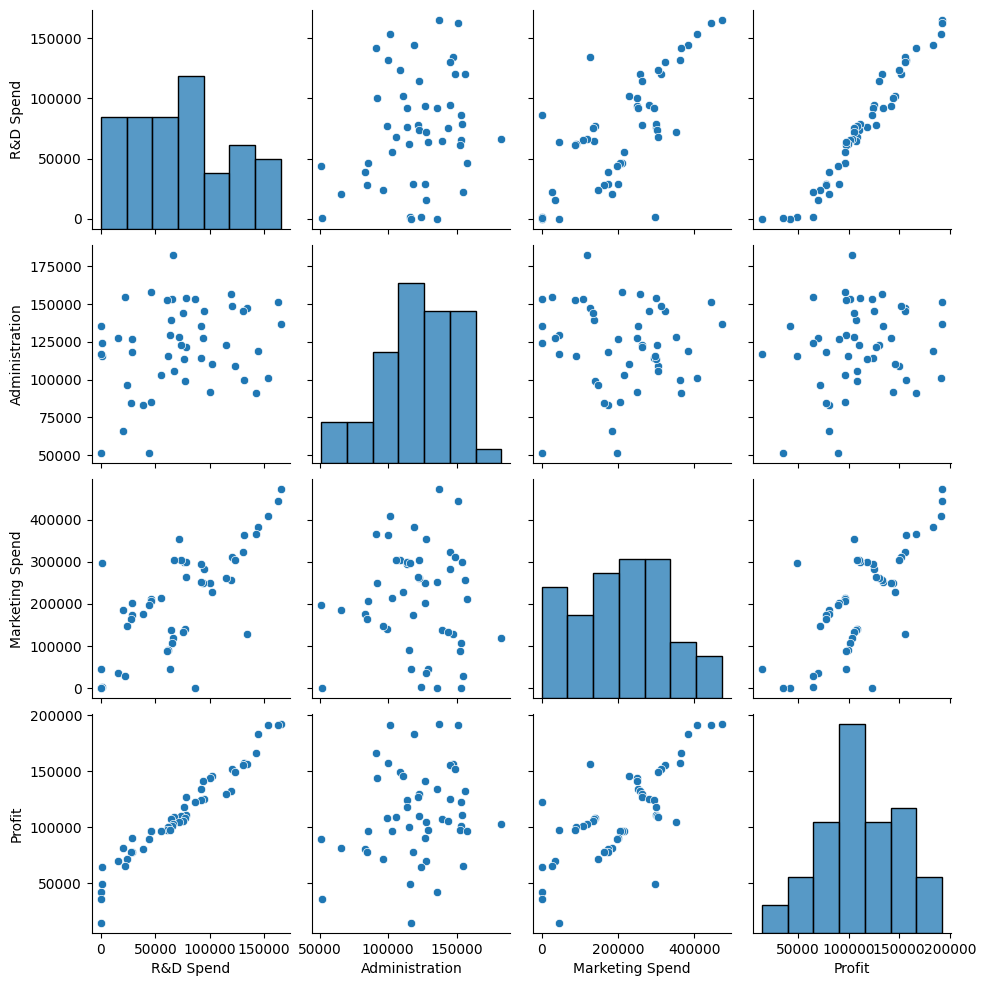

In [5]:

sns.pairplot(df)

Model Deletion Diagnostics (checking Outliers or Influencers)
Finding Cook's Distance

In [6]:
df1=df.rename({'R&D Spend':'RDS','Administration':'ADMS','Marketing Spend':'MKTS'},axis=1)

In [7]:
model=smf.ols("Profit~RDS+ADMS+MKTS",data=df1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sat, 01 Apr 2023   Prob (F-statistic):           4.53e-30
Time:                        14:30:22   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RDS            0.8057      0.045     17.846      0.000       0.715       0.897
ADMS          -0.0268      0.051     -0.526      0.602      -0.130       0.076
MKTS           0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
model_influence = model.get_influence()
(c,_)=model_influence.cooks_distance
(c,_)

(array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
        1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
        4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
        1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
        8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
        4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
        5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
        1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
        7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
        5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
        1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
        1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
        1.90527441e-01, 2.88082293e-01]),
 array([1.        , 0.99997771, 0.99791128, 0.99904583, 0.9995713 ,
        0.99971836, 0.9999

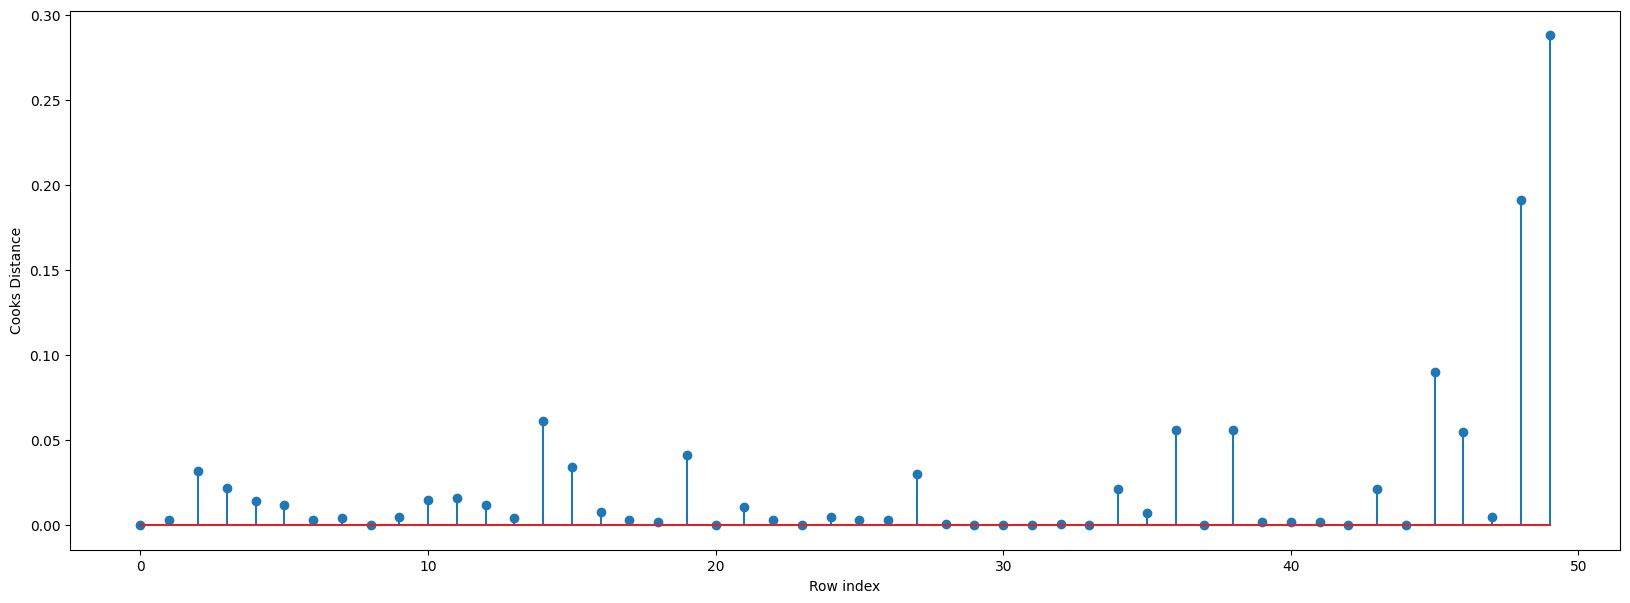

In [9]:
df1=df.rename({'R&D Spend':'RDS','Administration':'ADMS','Marketing Spend':'MKTS'},axis=1)
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [10]:
#index and value of influencer where c is more.
(np.argmax(c),np.max(c))

(49, 0.2880822927543272)

Since the value is <1 ,we can say that there are no any outliers .

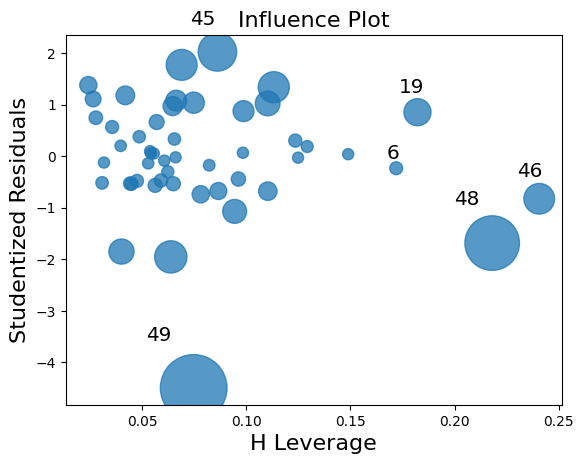

In [11]:
#high influence point
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

Index 48 and 49 has highest Cook's Distance Thus it will be wise to drop this row from the data set

In [12]:
df1[df1.index.isin([49,48])]

,RDS,ADMS,MKTS,State,Profit
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


## Correlation Matrix

In [13]:
corr=df.corr()

<Axes: >

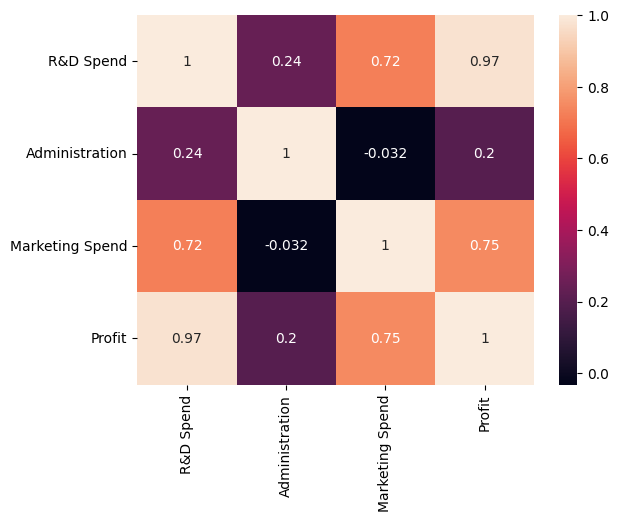

In [14]:
sns.heatmap(corr,annot=True)


In [15]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### Regression model

In [16]:
df = pd.get_dummies(df,columns=['State'])

In [17]:
X=df[['R&D Spend','Administration','Marketing Spend','State_California','State_Florida','State_New York']]
Y=df[["Profit"]]

In [18]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [19]:
model=sm.OLS(Y,X).fit()
predictions= model.predict(X)

In [20]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Sat, 01 Apr 2023   Prob (F-statistic):           1.34e-27
Time:                        14:30:24   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
R&D Spend            0.8060      0.046     17.369      0.000       0.712       0.900
Administration      -0.0270      0.052     -0.517      0.608      -0.132       0.078
Marketing Spend      0.0270      0.017      1.574      0.123      -0.008       0.062
State_California  5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
State_Florida     5.032e+04   7251.767      6.940      0.000    3.57e+04    6.49e+04
State_New York    5.008e+04   6952.587      7.204      0.000    3.61e+04    6.41e+04
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     2.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**R sq value is good hence the model can be accepted but some variable has high p value due to which there is multicollinearity issue in this model**

## Multicollinearity

## Find VIF(Variance inflation facvtor)

In [21]:
vif=pd.DataFrame()
vif["VIF"]=[variance_inflation_factor(X.values,i)for i in range(X.shape[1])]
vif["features"]=X.columns
vif.round(1)

,VIF,features
0,2.5,R&D Spend
1,1.2,Administration
2,2.4,Marketing Spend
3,9.0,State_California
4,9.4,State_Florida
5,9.2,State_New York


Administration has lowest VIF hence we need to discard this to impore model

In [22]:
new_df=df[['R&D Spend','Marketing Spend','State_California','State_Florida','State_New York']]

In [23]:
new_model=sm.OLS(Y,new_df).fit()
new_predictions=new_model.predict(new_df)

In [24]:
new_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     215.8
Date:                Sat, 01 Apr 2023   Prob (F-statistic):           9.72e-29
Time:                        14:30:24   Log-Likelihood:                -525.53
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1071.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
R&D Spend            0.7967      0.042     18.771      0.000       0.711       0.882
Marketing Spend      0.0298      0.016      1.842      0.072      -0.003       0.062
State_California  4.696e+04   3119.471     15.053      0.000    4.07e+04    5.32e+04
State_Florida      4.71e+04   3670.129     12.833      0.000    3.97e+04    5.45e+04
State_New York    4.694e+04   3342.591     14.043      0.000    4.02e+04    5.37e+04
==============================================================================
Omnibus:                       14.640   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.037
Skew:                          -0.938   Prob(JB):                     2.70e-05
Kurtosis:                       5.565   Cond. No.                     9.45e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.45e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Final Model

In [25]:
new_df=df.drop(df.index[[48,49]])

In [26]:
new_X=new_df[['R&D Spend','Marketing Spend','State_California','State_Florida','State_New York']]

In [27]:
new_Y=new_df[["Profit"]]

In [28]:
final_model= sm.OLS(new_Y,new_X).fit()
predictions=final_model.predict(new_X)

In [29]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     265.9
Date:                Sat, 01 Apr 2023   Prob (F-statistic):           1.02e-29
Time:                        14:30:24   Log-Likelihood:                -494.30
No. Observations:                  48   AIC:                             998.6
Df Residuals:                      43   BIC:                             1008.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
R&D Spend            0.7692      0.035     22.072      0.000       0.699       0.840
Marketing Spend      0.0251      0.013      1.908      0.063      -0.001       0.052
State_California  5.183e+04   2710.866     19.120      0.000    4.64e+04    5.73e+04
State_Florida     5.046e+04   3078.590     16.391      0.000    4.43e+04    5.67e+04
State_New York     5.09e+04   2936.767     17.333      0.000     4.5e+04    5.68e+04
==============================================================================
Omnibus:                        0.133   Durbin-Watson:                   1.645
Prob(Omnibus):                  0.936   Jarque-Bera (JB):                0.304
Skew:                           0.097   Prob(JB):                        0.859
Kurtosis:                       2.661   Cond. No.                     1.02e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# We will try to improve R2 more

# Sq Root transformation of X

In [30]:

X_sqrt= np.sqrt(new_df[['R&D Spend','Marketing Spend','State_California','State_New York']])


In [31]:
i_model=sm.OLS(new_Y,X_sqrt).fit()

In [32]:
i_prediction=i_model.predict(X_sqrt)

In [33]:
i_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Profit   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              939.5
Date:                Sat, 01 Apr 2023   Prob (F-statistic):                    5.66e-42
Time:                        14:30:24   Log-Likelihood:                         -522.95
No. Observations:                  48   AIC:                                      1054.
Df Residuals:                      44   BIC:                                      1061.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
R&D Spend          359.6844     25.836     13.922      0.000     307.615     411.753
Marketing Spend     36.7385     14.589      2.518      0.016       7.336      66.141
State_California  6905.6218   4308.683      1.603      0.116   -1777.959    1.56e+04
State_New York    6898.4549   4466.383      1.545      0.130   -2102.948    1.59e+04
==============================================================================
Omnibus:                       14.760   Durbin-Watson:                   1.074
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.713
Skew:                           1.173   Prob(JB):                     0.000235
Kurtosis:                       4.689   Cond. No.                     1.42e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Sq Root transformation of Y

In [34]:
Y_sqrt=np.sqrt(new_df["Profit"])

In [35]:
ii_model=sm.OLS(Y_sqrt,new_X).fit()

In [36]:
ii_prediction=ii_model.predict(new_X)

In [37]:
ii_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     223.3
Date:                Sat, 01 Apr 2023   Prob (F-statistic):           3.68e-28
Time:                        14:30:24   Log-Likelihood:                -185.87
No. Observations:                  48   AIC:                             381.7
Df Residuals:                      43   BIC:                             391.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
R&D Spend            0.0012   5.64e-05     20.622      0.000       0.001       0.001
Marketing Spend   2.473e-05   2.13e-05      1.159      0.253   -1.83e-05    6.78e-05
State_California   241.0032      4.390     54.894      0.000     232.149     249.857
State_Florida      240.7325      4.986     48.283      0.000     230.678     250.787
State_New York     240.9886      4.756     50.669      0.000     231.397     250.580
==============================================================================
Omnibus:                        4.530   Durbin-Watson:                   1.406
Prob(Omnibus):                  0.104   Jarque-Bera (JB):                3.371
Skew:                          -0.532   Prob(JB):                        0.185
Kurtosis:                       3.745   Cond. No.                     1.02e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Sq Root transformation of X & Y


In [38]:
iii_model=sm.OLS(Y_sqrt,X_sqrt).fit()

In [39]:
iii_prediction=iii_model.predict(X_sqrt)

In [40]:
iii_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Profit   R-squared (uncentered):                   0.977
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                              462.8
Date:                Sat, 01 Apr 2023   Prob (F-statistic):                    2.51e-35
Time:                        14:30:25   Log-Likelihood:                         -257.60
No. Observations:                  48   AIC:                                      523.2
Df Residuals:                      44   BIC:                                      530.7
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
R&D Spend            0.7386      0.103      7.196      0.000       0.532       0.945
Marketing Spend      0.2076      0.058      3.581      0.001       0.091       0.324
State_California    61.2557     17.118      3.579      0.001      26.757      95.754
State_New York      55.2471     17.744      3.114      0.003      19.486      91.008
==============================================================================
Omnibus:                        8.004   Durbin-Watson:                   1.270
Prob(Omnibus):                  0.018   Jarque-Bera (JB):                7.007
Skew:                           0.851   Prob(JB):                       0.0301
Kurtosis:                       3.778   Cond. No.                     1.42e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## i_model has best R2 value hence we will use that model

lasso ridge


In [43]:
# Load the necessary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

df = pd.read_csv("/content/50_Startups.csv")
df = pd.get_dummies(df,columns=['State'])

# Split the data into training and test sets
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Specify the predictor and response variables
X_train = train_data[['R&D Spend','Marketing Spend','State_California','State_New York']]
y_train = train_data['Profit']

X_test = test_data[['R&D Spend','Marketing Spend','State_California','State_New York']]
y_test = test_data['Profit']

# Create Lasso and Ridge regression models
lasso_model = Lasso(alpha=0.1)
ridge_model = Ridge(alpha=0.1)

# Fit the models to the training data
lasso_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)

# Predict the test data using the models
lasso_pred = lasso_model.predict(X_test)
ridge_pred = ridge_model.predict(X_test)

# Calculate the mean squared error for the predictions
lasso_mse = mean_squared_error(y_test, lasso_pred)
ridge_mse = mean_squared_error(y_test, ridge_pred)

print("Lasso MSE:", lasso_mse)
print("Ridge MSE:", ridge_mse)


Lasso MSE: 68138895.62667912
Ridge MSE: 68121688.84633844


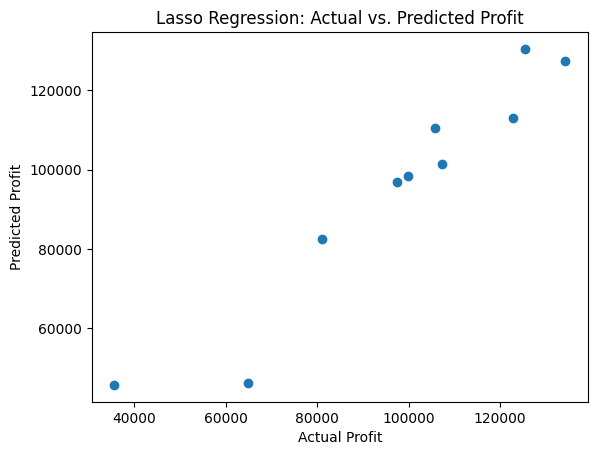

In [44]:
import matplotlib.pyplot as plt

# Make predictions on the test data using the Lasso model
lasso_pred = lasso_model.predict(X_test)

# Plot a scatter plot of the predicted and actual values
plt.scatter(y_test, lasso_pred)
plt.xlabel("Actual Profit")
plt.ylabel("Predicted Profit")
plt.title("Lasso Regression: Actual vs. Predicted Profit")
plt.show()